In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (also known as the target or response variable) and one or more independent variables (also known as predictors or features). It assumes a linear relationship between the dependent variable and the independent variables.

The primary goal of linear regression is to find the best-fitting line (a straight line in the case of simple linear regression) that minimizes the difference between the predicted values and the actual values of the dependent variable. This line is represented by the equation:

y = mx + b

Where:

y is the dependent variable (the one being predicted).
x is the independent variable (the predictor).
m is the slope of the line, representing the change in y for a unit change in x.
b is the y-intercept, representing the value of y when x is 0.
There are two main types of linear regression:

## Simple Linear Regression: 
This involves a single independent variable to predict the dependent variable. The equation becomes:
* y = b0 + b1 * x

## Multiple Linear Regression: 
This deals with multiple independent variables to predict the dependent variable. The equation becomes:
* y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn

The "b0, b1, b2, ..., bn" are the coefficients that need to be estimated during the training process to find the best-fitting line. The process of finding these coefficients involves minimizing the sum of squared differences between the actual and predicted values, which is known as the "least squares" method.

## Simple Linear Regression

### Example:
Suppose we have collected data for a group of students that includes the number of hours they studied for an exam and their corresponding exam scores. We want to build a linear regression model to predict a student's exam score based on the number of hours they study.

Hours Studied (x)	Exam Score (y)

        2	           65
        3	           75
        4	           82
        5	           90
        6	           85

### Plotting the Data

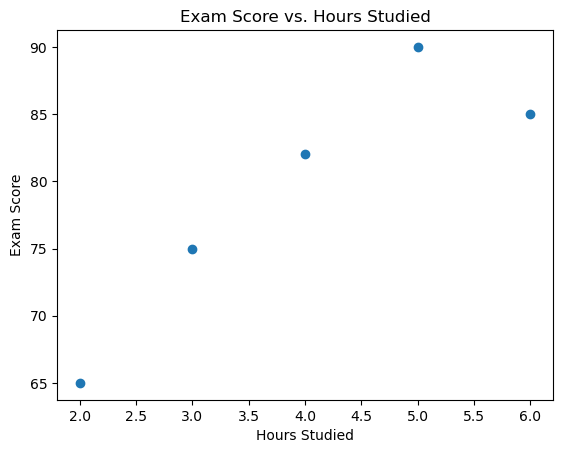

In [2]:
# Data
hours_studied = [2, 3, 4, 5, 6]
exam_scores = [65, 75, 82, 90, 85]

# Plotting the data
plt.scatter(hours_studied, exam_scores)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Hours Studied')
plt.show()


### Fitting the Linear Regression Model

In [3]:
# Reshape the data to the required format
hours_studied = np.array(hours_studied).reshape(-1, 1)
exam_scores = np.array(exam_scores)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(hours_studied, exam_scores)

# Extracting the coefficients
slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (b):", intercept)


Slope (m): 5.5
Intercept (b): 57.400000000000006


### Making Predictions

In [4]:
# Predicting exam score for 7 hours of study
hours_to_predict = 7
predicted_score = model.predict([[hours_to_predict]])

print("Predicted Exam Score for {} hours of study: {:.2f}".format(hours_to_predict, predicted_score[0]))


Predicted Exam Score for 7 hours of study: 95.90


## Multiple Linear Regression

### Example:
Suppose we have collected data on house prices along with the corresponding features: area, number of bedrooms, and age of the house. We want to build a multiple linear regression model to predict house prices based on these three features.

Area (x1)	Bedrooms (x2)	Age (x3)	House Price (y)

    1500        3	          10	       250,000
    2000	    4	           5	       320,000
    1800	    3	           8	       280,000
    1200	    2	          15	       200,000
    2500	    5	           2	       380,000

### Prepare Data

In [5]:
# Sample data
data = {
    'Study Hours': [2, 3, 4, 5, 6],
    'Hours Slept': [7, 6, 6.5, 8, 7.5],
    'Exam Score': [65, 75, 82, 90, 85]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features (independent variables)
X = df[['Study Hours', 'Hours Slept']]

# Target (dependent variable)
y = df['Exam Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Split Data into Features and Target

### Create and Fit the Multiple Linear Regression Model

In [6]:
# Create and fit the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Extracting the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (b1, b2, b3):", coefficients)
print("Intercept (b0):", intercept)


Coefficients (b1, b2, b3): [5.41269841 1.22222222]
Intercept (b0): 48.63492063492062


### Making Predictions

In [7]:
# New data point for prediction
new_data = [[3, 7]]

# Predicting house price for the new data point
y_pred = model.predict(new_data)

print("Predicted House Price:", y_pred[0])


Predicted House Price: 73.42857142857142


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Oridinary Least Squares
Ordinary Least Squares (OLS) is a common method used in linear regression to estimate the coefficients of the best-fitting line or plane for the given data. The goal of OLS is to find the line (in simple linear regression) or hyperplane (in multiple linear regression) that minimizes the sum of the squared differences between the predicted values and the actual values of the dependent variable.



The formula for OLS in simple linear regression:


Sum of squared residuals = Σ(y - ŷ)^2

In multiple linear regression, the formula is extended to handle multiple predictors (x1, x2, ..., xn):

Sum of squared residuals = Σ(y - ŷ)^2

where ŷ is the predicted value of the dependent variable y based on the linear regression model:

ŷ = b0 + b1 * x1 + b2 * x2 + ... + bn * xn

To find the coefficients (b0, b1, b2, ..., bn) that minimize the sum of squared residuals, the OLS method uses calculus to calculate the values that make the derivative of the sum of squared residuals equal to zero. Solving the derivative equations leads to the closed-form solutions for the coefficients.

In simple linear regression, the closed-form solutions are:

b1 = Σ((xi - x̄) * (yi - ȳ)) / Σ((xi - x̄)^2)
b0 = ȳ - b1 * x̄

where xi is the value of the independent variable, yi is the corresponding value of the dependent variable, x̄ is the mean of the independent variable, and ȳ is the mean of the dependent variable.

In multiple linear regression, the closed-form solutions are obtained using matrix algebra and involve solving a system of equations.

The OLS method is widely used because it provides a straightforward and efficient way to estimate the coefficients of a linear regression model. It works well when the assumptions of linear regression, such as linearity and homoscedasticity (constant variance of the errors), are met. When these assumptions are not met, other regression techniques or data transformations may be more appropriate. Additionally, OLS is sensitive to outliers, and it is essential to check for influential data points that might heavily influence the regression results.

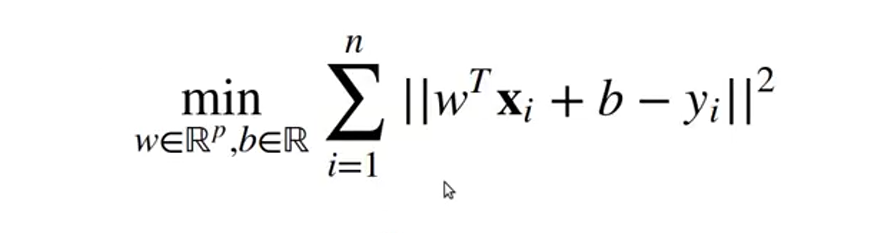

Coefficients (b1, b2): [5.41269841 1.22222222]
Intercept (b0): 48.63492063492062
Predicted Exam Score: 78.84126984126983
Mean Squared Error (MSE): 14.755353993449182


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


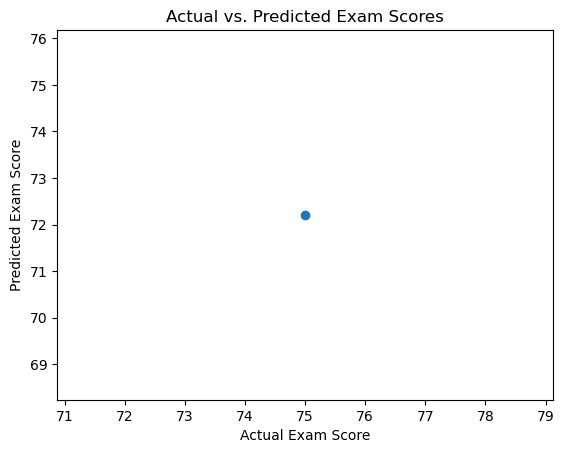

In [8]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Extracting the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (b1, b2):", coefficients)
print("Intercept (b0):", intercept)

# New data point for prediction
new_data = [[4, 7]]

# Predicting the exam score for the new data point
y_pred = model.predict(new_data)

print("Predicted Exam Score:", y_pred[0])

# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Scatter plot of actual exam scores against predicted scores
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()



## Emperical Risk Minimization
Empirical Risk Minimization (ERM) is a fundamental principle in statistical learning theory and machine learning. It is used to find the best model or hypothesis from a given set of models by minimizing the empirical risk on the training data. The empirical risk is an estimate of the expected or true risk of a model on unseen data based on its performance on the training data.

In ERM, we assume that the training data is generated from an unknown probability distribution, and our goal is to find a model that performs well on unseen data from the same distribution. The model's performance is typically measured using a loss or error function, which quantifies the discrepancy between the model's predictions and the actual targets in the training data.

Mathematically, the empirical risk of a model is calculated as the average loss over the training data:

Empirical Risk = (1/n) * Σ(loss(model(xᵢ), yᵢ))

Where:
- n is the number of data points in the training set.
- (xᵢ, yᵢ) is the ith training data point, where xᵢ is the input features, and yᵢ is the corresponding target.

The ERM principle suggests that the model that minimizes the empirical risk on the training data is likely to generalize well on unseen data, provided the model class (set of possible models) is rich enough to represent the underlying data distribution accurately.

In regression problems, the goal is to find a model that can predict continuous values for the target variable. The empirical risk is typically measured using a regression loss, such as mean squared error (MSE) or mean absolute error (MAE).

Once the model with the minimum empirical risk is selected, it becomes the final model used for predictions on new, unseen data.

It's essential to keep in mind that ERM is not without its limitations. Overfitting is a common challenge in ERM, where the selected model performs exceptionally well on the training data but fails to generalize to new data. To mitigate overfitting, regularization techniques (e.g., Ridge regression, Lasso regression) are often used to add a penalty to the model's complexity, encouraging it to select simpler models that are less prone to overfitting.

Overall, ERM is a fundamental concept in machine learning and forms the basis for training models on labeled data to achieve predictive accuracy on unseen data.

## Ridge Regression

Ridge regression, also known as L2 regularization, is a linear regression technique used to handle the problem of multicollinearity (high correlation) among the independent variables in a multiple linear regression model. It adds a penalty term to the ordinary least squares (OLS) cost function to shrink the coefficients toward zero, reducing the impact of collinearity and potentially improving the model's performance and generalization.

The primary goal of ridge regression is to find the best-fitting line (or hyperplane) that minimizes the following cost function:

Cost function = Σ(y - ŷ)^2 + α * Σ(bi^2)

Where:

Σ(y - ŷ)^2 is the sum of squared residuals (similar to the OLS cost function).
Σ(bi^2) is the sum of squared coefficients (excluding the intercept).
α is the regularization parameter, also known as the ridge parameter. It's a non-negative hyperparameter that controls the amount of regularization applied to the model. When α is set to 0, ridge regression becomes the same as OLS. As α increases, the impact of regularization on the coefficients becomes stronger.
The regularization term, α * Σ(bi^2), penalizes the model for having large coefficient values, effectively shrinking them toward zero. This helps to reduce the impact of multicollinearity and makes the model less sensitive to the presence of correlated predictors. By doing so, ridge regression can lead to more stable and reliable coefficient estimates.

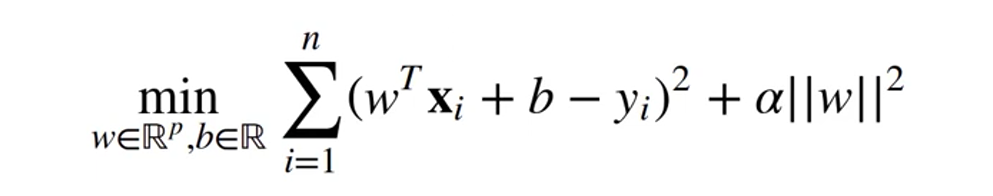

Advantages of Ridge Regression:

* Reduces the impact of multicollinearity, making the model more stable.
* Can lead to better generalization and performance on new data, especially when the dataset is small or contains a large number of correlated features.
* Handles cases where the number of predictors (features) is greater than the number of samples (observations).

Disadvantages of Ridge Regression:

* Ridge regression doesn't perform variable selection, so it may not be suitable if you have prior knowledge that some features are entirely irrelevant.
* The choice of the regularization parameter α is critical, and it requires tuning, often using techniques like cross-validation.

Coefficients (b1, b2): [4.8807947  1.09271523]
Intercept (b0): 51.83443708609272
Predicted Exam Score: 79.00662251655629
Mean Squared Error (MSE): 16.053023990175866


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


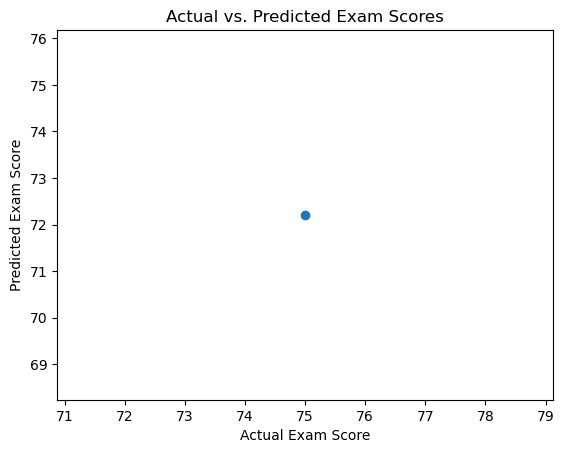

In [9]:
# Create a Ridge regression model with alpha=1 (regularization strength)
ridge_model = Ridge(alpha=1)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = ridge_model.predict(X_test)

# Extracting the coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

print("Coefficients (b1, b2):", coefficients)
print("Intercept (b0):", intercept)

# New data point for prediction
new_data = [[4, 7]]

# Predicting the exam score for the new data point
y_pred = ridge_model.predict(new_data)

print("Predicted Exam Score:", y_pred[0])

# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Scatter plot of actual exam scores against predicted scores
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()


## Lasso regression
Lasso regression, short for "Least Absolute Shrinkage and Selection Operator," is another linear regression technique used for feature selection and regularization. Similar to ridge regression, lasso regression adds a penalty term to the ordinary least squares (OLS) cost function to shrink the coefficients towards zero. However, unlike ridge regression, lasso uses the L1 regularization term, which has the added benefit of performing feature selection by driving some coefficients to exactly zero.

The cost function for lasso regression is:

Cost function = Σ(y - ŷ)^2 + α * Σ|bi|

Where:

Σ(y - ŷ)^2 is the sum of squared residuals (similar to the OLS cost function).
Σ|bi| is the sum of the absolute values of the coefficients (excluding the intercept).
α is the regularization parameter, also known as the lasso parameter. As with ridge regression, it's a non-negative hyperparameter that controls the amount of regularization applied to the model. When α is set to 0, lasso regression becomes the same as OLS. As α increases, the impact of regularization on the coefficients becomes stronger.
The L1 regularization term, α * Σ|bi|, has the effect of encouraging some of the coefficients to become exactly zero, effectively performing feature selection. This means that lasso can be useful when dealing with high-dimensional datasets with many features, as it can automatically eliminate irrelevant features and focus on the most important ones.

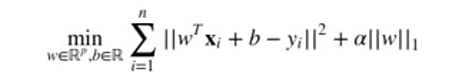

Advantages of Lasso Regression:

* Performs feature selection by driving some coefficients to exactly zero, making the model more interpretable and efficient.
* Helps handle multicollinearity and improves the model's generalization.
* Useful for datasets with a large number of features, especially when many of them are not relevant to the target variable.

Disadvantages of Lasso Regression:

* Lasso regression is less stable than ridge regression when the number of predictors is much larger than the number of samples.
* The choice of the regularization parameter α is critical, and it requires tuning, often using techniques like cross-validation.

Coefficients (b1, b2): [5.2 0. ]
Intercept (b0): 58.4
Predicted Exam Score: 79.2
Mean Squared Error (MSE): 17.640000000000025


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


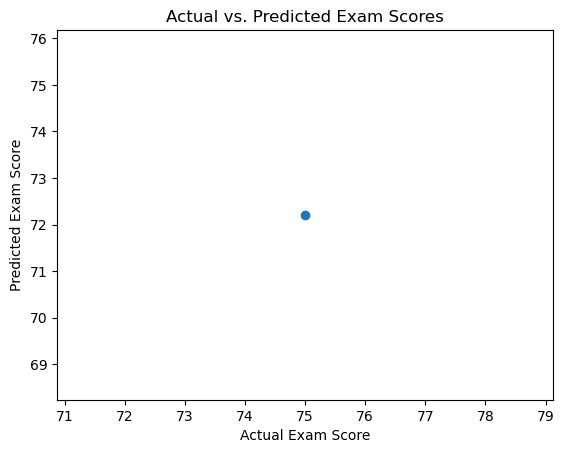

In [10]:
# Create a Lasso regression model with alpha=1 (regularization strength)
lasso_model = Lasso(alpha=1)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = lasso_model.predict(X_test)

# Extracting the coefficients
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

print("Coefficients (b1, b2):", coefficients)
print("Intercept (b0):", intercept)

# Predicting the exam score for the new data point
y_pred = lasso_model.predict(new_data)

print("Predicted Exam Score:", y_pred[0])

# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Scatter plot of actual exam scores against predicted scores
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()



## Model complexity
Model complexity refers to the level of sophistication or flexibility of a statistical or machine learning model in representing the underlying relationship between the input features and the target variable. In simple terms, it determines how well a model can fit the training data and how well it can generalize to new, unseen data.

In the context of model complexity, there are two main aspects to consider:

1. Underfitting: A model is said to be underfitting when it is too simple to capture the underlying patterns in the data. It fails to learn the training data and performs poorly on both the training data and new data (test/validation data). Underfitting occurs when the model is not complex enough to represent the true relationship between the features and the target.

2. Overfitting: A model is said to be overfitting when it is too complex and captures noise or random fluctuations in the training data rather than the true underlying patterns. It fits the training data very well, but its performance degrades significantly on new data. Overfitting occurs when the model is too flexible and starts to memorize the noise in the training data, leading to poor generalization.

Balancing Model Complexity:
The goal of building a good predictive model is to find the right balance between underfitting and overfitting. This is achieved through the process of model selection and regularization. Here are some key points to keep in mind:

1. Simple Models: When the data is not very complex and there are limited features or predictors, it is best to start with simpler models (e.g., linear regression) that have fewer parameters. Simple models tend to be less prone to overfitting and are easier to interpret.

2. Complex Models: As the complexity of the data increases, more flexible models (e.g., polynomial regression, decision trees, neural networks) can be considered. Complex models can capture intricate relationships in the data, but they also require more data to avoid overfitting.

3. Cross-Validation: To find the optimal model complexity, cross-validation techniques (e.g., k-fold cross-validation) are used to evaluate the model's performance on different subsets of the data. This helps in selecting the model that performs well on both the training data and new data.

4. Regularization: Regularization techniques (e.g., L1 and L2 regularization in linear regression, dropout in neural networks) can be employed to add a penalty to the model's complexity, encouraging it to select simpler models and avoid overfitting.

5. Bias-Variance Tradeoff: The relationship between model complexity, bias, and variance is known as the bias-variance tradeoff. It highlights the tradeoff between a model's ability to fit the training data well (low bias) and its ability to generalize to new data (low variance). As model complexity increases, bias tends to decrease, but variance tends to increase, and vice versa.

In summary, finding the right model complexity is a crucial step in building effective predictive models. It involves selecting models that can balance between capturing the underlying patterns in the data while avoiding overfitting. Regularization techniques and cross-validation play vital roles in achieving this balance and improving the model's performance on unseen data.

In [11]:
# Generate Sample Data
np.random.seed(0)
X = np.random.rand(10000, 1)  # Independent variable
y = 2 * X + 1 + 0.1 * np.random.randn(10000, 1)  # Dependent variable with noise


In [12]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict y values using the linear model
y_linear_pred = linear_model.predict(X)


In [13]:
# Create polynomial features for degrees 1, 2, and 3
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

X_poly_1 = poly_features_1.fit_transform(X)
X_poly_2 = poly_features_2.fit_transform(X)
X_poly_3 = poly_features_3.fit_transform(X)

# Create and fit polynomial regression models for degrees 1, 2, and 3
poly_model_1 = LinearRegression()
poly_model_2 = LinearRegression()
poly_model_3 = LinearRegression()

poly_model_1.fit(X_poly_1, y)
poly_model_2.fit(X_poly_2, y)
poly_model_3.fit(X_poly_3, y)

# Predict y values using polynomial models
y_poly_pred_1 = poly_model_1.predict(X_poly_1)
y_poly_pred_2 = poly_model_2.predict(X_poly_2)
y_poly_pred_3 = poly_model_3.predict(X_poly_3)


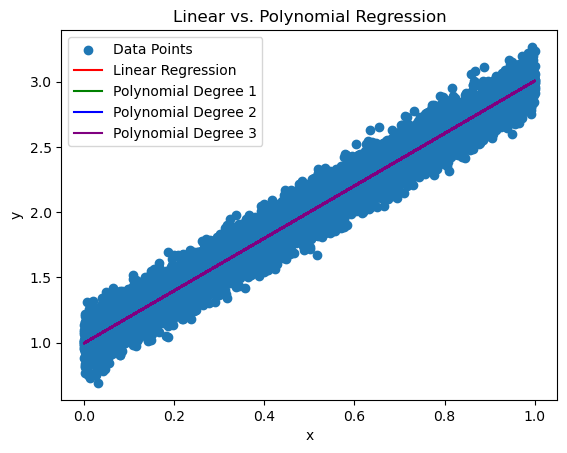

In [14]:
# Plot the original data points
plt.scatter(X, y, label='Data Points')

# Plot the linear regression model
plt.plot(X, y_linear_pred, label='Linear Regression', color='red')

# Plot the polynomial regression models
plt.plot(X, y_poly_pred_1, label='Polynomial Degree 1', color='green')
plt.plot(X, y_poly_pred_2, label='Polynomial Degree 2', color='blue')
plt.plot(X, y_poly_pred_3, label='Polynomial Degree 3', color='purple')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear vs. Polynomial Regression')
plt.legend()
plt.show()


In [15]:
# Calculate mean squared error for linear regression
mse_linear = mean_squared_error(y, y_linear_pred)*10000

# Calculate mean squared error for polynomial regression
mse_poly_1 = mean_squared_error(y, y_poly_pred_1)*10000
mse_poly_2 = mean_squared_error(y, y_poly_pred_2)*10000
mse_poly_3 = mean_squared_error(y, y_poly_pred_3)*10000

print("MSE Linear Regression:", mse_linear)
print("MSE Polynomial Degree 1:", mse_poly_1)
print("MSE Polynomial Degree 2:", mse_poly_2)
print("MSE Polynomial Degree 3:", mse_poly_3)

mse_poly_3 < mse_poly_2 < mse_poly_1

MSE Linear Regression: 98.09826851315043
MSE Polynomial Degree 1: 98.09826851315043
MSE Polynomial Degree 2: 98.09770546912621
MSE Polynomial Degree 3: 98.09539405379974


True

### Interpretation:
The linear regression model (degree 1) represents a simple model with a straight line that underfits the data.
The polynomial regression model with degree 2 captures some curvature in the data, and its performance (MSE) is lower than the linear model.
The polynomial regression model with degree 3 further captures the non-linear patterns, and its performance (MSE) is even lower than the models with degrees 1 and 2.

## The coefficient of determination R-squared (R²)
The coefficient of determination, denoted as R-squared (R²), is a statistical measure used to assess how well a regression model explains the variability of the dependent variable (target) around its mean. It represents the proportion of the variance in the target variable that is predictable from the independent variables (features) in the model. R-squared ranges from 0 to 1, where:

R² = 0 indicates that the model does not explain any of the variance in the target variable (worst fit).
R² = 1 indicates that the model perfectly explains all the variance in the target variable (best fit).
In other words, R² provides an indication of how well the model's predictions match the observed data. A higher R² value suggests that the model is a better fit to the data and can explain a larger proportion of the target variable's variability.

Mathematically, R² is calculated as follows:

R² = 1 - (SS_res / SS_tot)

Where:

SS_res is the sum of squared residuals (also known as the sum of squared errors or SSE), which measures the unexplained variance between the model's predicted values and the actual target values.
SS_tot is the total sum of squares, which measures the total variance of the target variable around its mean (also known as the total sum of squares or SST).
The formula can also be expressed as:

R² = (SS_tot - SS_res) / SS_tot

In this formulation, R² represents the proportion of the total variance that is explained by the model (the ratio of explained variance to the total variance).

### Interpretation of R-squared:

R² close to 0 indicates that the model does not explain much of the variance in the target variable and is likely a poor fit to the data.
R² close to 1 indicates that the model explains a large portion of the variance in the target variable and is a good fit to the data.
However, it's important to note that a high R² value does not necessarily mean that the model is a good predictor for new, unseen data. A high R² may be a result of overfitting, where the model is too complex and memorizes the noise in the training data. To avoid overfitting, it's essential to evaluate the model's performance on a separate validation or test dataset.


In [16]:
# Calculate R-squared

r_squared = r2_score(y, y_linear_pred)
print("R-squared:", r_squared)

R-squared: 0.9718142799040067


## Skewed target

When dealing with a linear regression model and your target variable (dependent variable) is skewed, it's essential to address the skewness for accurate modeling and interpretation of results. Skewed target variables can lead to biased parameter estimates and suboptimal predictions

Transform the Target Variable:

### Logarithmic Transformation: 
If your target variable is positively skewed (i.e., the right tail is longer), you can apply a logarithmic transformation to make it more symmetric. This is particularly useful when the data follows an exponential growth pattern.

y = np.log1p(y)  # Apply a logarithmic transformation (adding 1 to handle zero values)

### Box-Cox Transformation: 
This transformation is more general and can handle both positively and negatively skewed data. The scipy.stats library provides a function for the Box-Cox transformation.

y, _ = stats.boxcox(y)

### Use Robust Regression Techniques:
In cases where transformation doesn't fully resolve the skewness, consider using robust regression techniques like Huber regression or Theil-Sen regression. These methods are less sensitive to outliers and deviations from the normality assumption.

### Residual Analysis: 
After fitting the model, analyze the residuals (the differences between observed and predicted values) to check for any remaining patterns or skewness. You can use residual plots or statistical tests like the Shapiro-Wilk test to assess the normality of residuals.

### Consider Alternative Models: 
Linear regression assumes that the residuals are normally distributed. If the skewness persists even after transformations and robust regression, you might explore alternative models that do not assume normality, such as quantile regression or generalized linear models (e.g., Poisson regression or gamma regression, depending on the nature of the data).

### Binning or Categorization: 
For highly skewed target variables that represent counts or frequencies, you might consider binning or categorizing the data into discrete intervals. This can make the data more amenable to linear regression modeling.

### Weighted Linear Regression: 
If the skewness is due to heteroscedasticity (i.e., the variance of the target variable varies with the predictor variables), you can use weighted linear regression, where you assign different weights to data points based on the estimated variances.


## Linear regression, Ridge regression, and Lasso regression
Linear regression, Ridge regression, and Lasso regression are all linear regression techniques used for predicting numerical values (continuous target variables) based on input features. However, they differ in the way they handle model complexity and feature selection, making them suitable for different scenarios.

Linear Regression:
Linear regression is the most basic form of regression analysis, where the goal is to find the best-fitting linear relationship between the input features and the target variable. It estimates the coefficients of the linear equation that minimizes the sum of squared residuals (errors) between the predicted and actual values.
Advantages of Linear Regression:

Simple and easy to implement.
Fast training and prediction time.
Suitable for situations where there is no concern about multicollinearity among the features.
Disadvantages of Linear Regression:

Prone to overfitting if the data contains highly correlated features.
Cannot handle multicollinearity well, which might lead to unstable coefficient estimates.
Ridge Regression (L2 Regularization):
Ridge regression is an extension of linear regression that includes a regularization term to the cost function, which is the sum of squared residuals plus the sum of squared coefficients (L2 regularization term). The regularization parameter (alpha) controls the strength of the penalty applied to the coefficients, effectively shrinking them toward zero.
Advantages of Ridge Regression:

Helps in reducing the impact of multicollinearity among the features.
Can lead to better generalization and performance on new data, especially when the dataset has a large number of correlated features.
Disadvantages of Ridge Regression:

Does not perform feature selection; it retains all features but shrinks their coefficients.
Lasso Regression (L1 Regularization):
Lasso regression is another extension of linear regression that includes a regularization term to the cost function, which is the sum of squared residuals plus the sum of the absolute values of the coefficients (L1 regularization term). Like Ridge regression, the regularization parameter (alpha) controls the strength of the penalty applied to the coefficients.
Advantages of Lasso Regression:

Performs feature selection by driving some coefficients to exactly zero, effectively eliminating irrelevant features from the model.
Useful when dealing with high-dimensional datasets with many features, as it automatically selects the most important features.
Disadvantages of Lasso Regression:

Lasso may not perform well if there is multicollinearity among the features.
More computationally expensive compared to linear regression.
Choosing Between Linear Regression, Ridge Regression, and Lasso Regression:

Use linear regression when there is no concern about multicollinearity and you prefer simplicity.
Use Ridge regression when multicollinearity is present or when you want to reduce the impact of correlated features.
Use Lasso regression when feature selection is desired or when dealing with high-dimensional datasets.
In practice, the choice of which regression technique to use depends on the characteristics of the data and the specific goals of the modeling task. Sometimes, a combination of Ridge and Lasso (Elastic Net regression) is used to take advantage of both regularization techniques.

* Linear Regression: 


    No regularization, prone to overfitting, and not suitable when multicollinearity is present.

* Ridge Regression: 


    Balances between simplicity and complexity by reducing multicollinearity and avoiding overfitting. It does not perform feature selection but stabilizes coefficient estimates.

* Lasso Regression:


    Balances between simplicity and complexity by performing feature selection and driving some coefficients to zero. Useful for selecting important features in high-dimensional datasets.

## Plotting coefficient values (LR)
To plot the coefficient values of a linear regression model in Python, you can use the coefficients obtained after fitting the model and visualize them using a bar plot or any other suitable visualization method. 

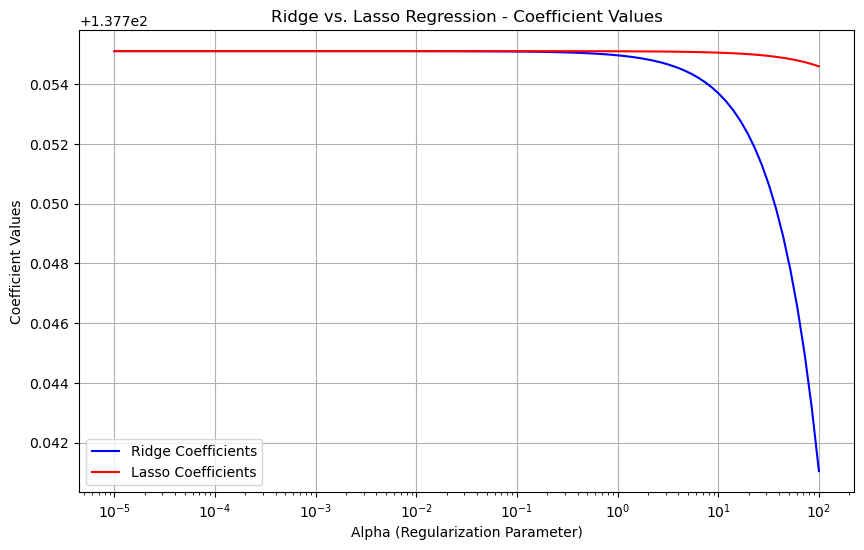

In [17]:
# Sample data
data = {
    'Area': [1500, 2000, 1800, 1200, 2500],
    'House_Price': [250000, 320000, 280000, 200000, 380000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df[['Area']]
y = df['House_Price']

# Values of alpha for Ridge and Lasso regularization
alphas = np.logspace(-5, 2, 100)  # 100 values between 10^-5 and 10^2

# Initialize lists to store coefficient values
ridge_coeffs = []
lasso_coeffs = []

# Fit Ridge and Lasso regression models for different alpha values
for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    ridge_coeffs.append(ridge_model.coef_[0])
    
    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, y)
    lasso_coeffs.append(lasso_model.coef_)

# Plotting the coefficient values for Ridge and Lasso regression
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coeffs, label='Ridge Coefficients', color='blue')
plt.plot(alphas, lasso_coeffs, label='Lasso Coefficients', color='red')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Coefficient Values')
plt.xscale('log')
plt.title('Ridge vs. Lasso Regression - Coefficient Values')
plt.legend()
plt.grid(True)
plt.show()


## Ridge Coefficients

We fit a Ridge regression model to the data using Ridge() from scikit-learn. You can adjust the alpha parameter to control the regularization strength. A larger alpha value will result in stronger regularization, potentially shrinking the coefficients toward zero.

We obtain the coefficients (including the intercept) of the fitted Ridge regression model using ridge_model.coef_ and ridge_model.intercept_.

We create a bar plot to visualize the coefficients, including the intercept and individual feature coefficients.

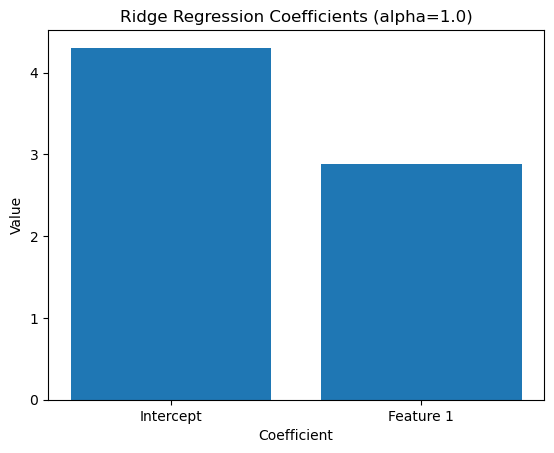

In [18]:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit a Ridge regression model with a specified alpha (regularization strength)
alpha = 1.0  # You can adjust the alpha parameter
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X, y)

# Get the coefficients (including the intercept)
coefficients = ridge_model.coef_[0]
intercept = ridge_model.intercept_[0]

# Create a bar plot to visualize the coefficients
n_features = X.shape[1]
feature_names = ['Feature {}'.format(i) for i in range(1, n_features + 1)]
plt.bar(['Intercept'] + feature_names, [intercept] + list(coefficients))
plt.xlabel('Coefficient')
plt.ylabel('Value')
plt.title('Ridge Regression Coefficients (alpha={})'.format(alpha))
plt.show()


## Learning Curve
A learning curve is a useful tool for assessing the performance and behavior of a machine learning model, including linear regression models. It shows how the model's performance (e.g., mean squared error or another relevant metric) changes as the amount of training data increases. Learning curves can help you understand whether your model is underfitting or overfitting and whether collecting more data would be beneficial. 

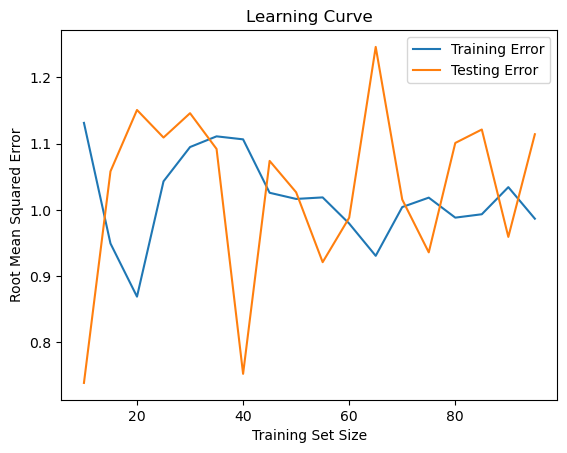

In [19]:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Define a function to plot the learning curve
def plot_learning_curve(model, X, y):
    train_errors, test_errors = [], []
    sizes = np.arange(10, len(X), step=5)  # Vary the training set size

    for size in sizes:
        X_train, X_test, y_train, y_test = train_test_split(X[:size], y[:size], test_size=0.2, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    plt.plot(sizes, np.sqrt(train_errors), label='Training Error')
    plt.plot(sizes, np.sqrt(test_errors), label='Testing Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Root Mean Squared Error')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Create a linear regression model
model = LinearRegression()

# Plot the learning curve
plot_learning_curve(model, X, y)


## Understanding L1 and l2 Penalties

L1 and L2 penalties, also known as regularization terms or regularization techniques, are used in linear regression and other machine learning models to prevent overfitting and improve model generalization by adding a penalty term to the loss function. These penalties encourage the model to have smaller coefficients or parameters, which can help in selecting a simpler and more interpretable model. Here's an overview of L1 and L2 penalties in the context of linear regression:

### L1 Regularization (Lasso Regression):

Penalty Term: L1 regularization adds the absolute values of the coefficients as a penalty term to the linear regression loss function.

Loss = Mean Squared Error (MSE) + λ * Σ|βi|

where:
* MSE is the mean squared error between predicted and actual values.
* λ (lambda) is the regularization strength, which controls the amount of penalty.
* Σ|βi| is the sum of the absolute values of the model coefficients.

Effect on Coefficients: L1 regularization encourages sparsity in the coefficients. It tends to push some coefficients to exactly zero, effectively performing feature selection by excluding some features from the model.
Use Case: L1 regularization is useful when you suspect that only a subset of the features is relevant, and you want to automatically select the most important ones.

### L2 Regularization (Ridge Regression):

Penalty Term: L2 regularization adds the squares of the coefficients as a penalty term to the linear regression loss function.

Loss = Mean Squared Error (MSE) + λ * Σ(βi^2)

where:
* MSE is the mean squared error as in ordinary linear regression.
* λ (lambda) is the regularization strength, controlling the amount of penalty.
* Σ(βi^2) is the sum of the squares of the model coefficients.

Effect on Coefficients: L2 regularization penalizes large coefficients, making them smaller but not exactly zero. It encourages the model to distribute the impact of all features rather than relying heavily on a few.
Use Case: L2 regularization is suitable when you want to prevent large coefficients that might lead to overfitting, but you believe that most of the features are relevant.

The choice between L1 and L2 regularization depends on the problem and the underlying assumptions about the data:

* Use L1 (Lasso) when you suspect that only a subset of features is relevant, and you want feature selection.
* Use L2 (Ridge) when you want to prevent large coefficients and distribute the impact of all features.

You can also use a combination of L1 and L2 regularization, known as Elastic Net regularization, to leverage both penalties simultaneously.

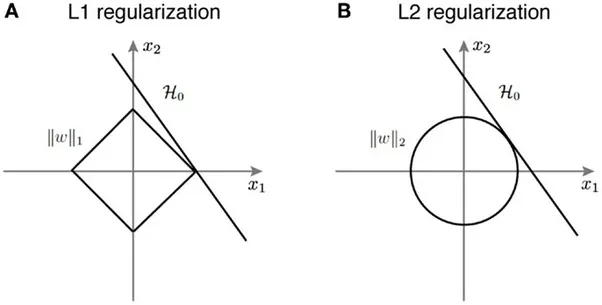

In [20]:
## Lasso Cross-Validation

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LassoCV model with a range of alpha values
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
lasso_cv = LassoCV(alphas=alphas, cv=5)  # cv specifies the number of cross-validation folds

# Fit the LassoCV model to the data
lasso_cv.fit(X_train, y_train)

# Get the best alpha value selected by LassoCV
best_alpha = lasso_cv.alpha_

# Create a Lasso model with the best alpha
best_lasso = lasso_cv

# Make predictions on the test set
y_pred = best_lasso.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Best alpha: {best_alpha}")
print(f"Mean Squared Error on Test Set: {mse}")


Best alpha: 0.001
Mean Squared Error on Test Set: 0.9175486585320941


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
## Ridge Cross-Validation

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RidgeCV model with a range of alpha values
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # cv specifies the number of cross-validation folds

# Fit the RidgeCV model to the data
ridge_cv.fit(X_train, y_train)

# Get the best alpha value selected by RidgeCV
best_alpha = ridge_cv.alpha_

# Create a Ridge model with the best alpha
best_ridge = ridge_cv

# Make predictions on the test set
y_pred = best_ridge.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Best alpha: {best_alpha}")
print(f"Mean Squared Error on Test Set: {mse}")


Best alpha: 0.001
Mean Squared Error on Test Set: 0.9177455337776722


## Elastic Net

Elastic Net is a regularization technique that combines both L1 (Lasso) and L2 (Ridge) penalties in a linear regression model. It adds both the absolute values of the coefficients (L1 regularization) and the squares of the coefficients (L2 regularization) to the linear regression loss function. This combination allows Elastic Net to enjoy the benefits of both L1 and L2 regularization while mitigating some of their drawbacks.

Loss = Mean Squared Error (MSE) + λ1 * Σ|βi| + λ2 * Σ(βi^2)

Where:

* MSE is the mean squared error between predicted and actual values.
* λ1 and λ2 are hyperparameters that control the strengths of the L1 and L2 penalties, respectively.
* Σ|βi| is the sum of the absolute values of the model coefficients.
* Σ(βi^2) is the sum of the squares of the model coefficients.

Elastic Net is useful when you have a large number of features, and you suspect that some of them are irrelevant (L1 helps with feature selection) while others might be highly correlated (L2 helps with handling multicollinearity).


In [22]:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 2)
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Elastic Net model with specified alpha values
alpha = 0.5  # The alpha parameter controls the balance between L1 and L2 regularization
elastic_net = ElasticNet(alpha=alpha)

# Fit the Elastic Net model to the data
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Mean Squared Error on Test Set: 2.0592887366753323


### Comparing Unit balls

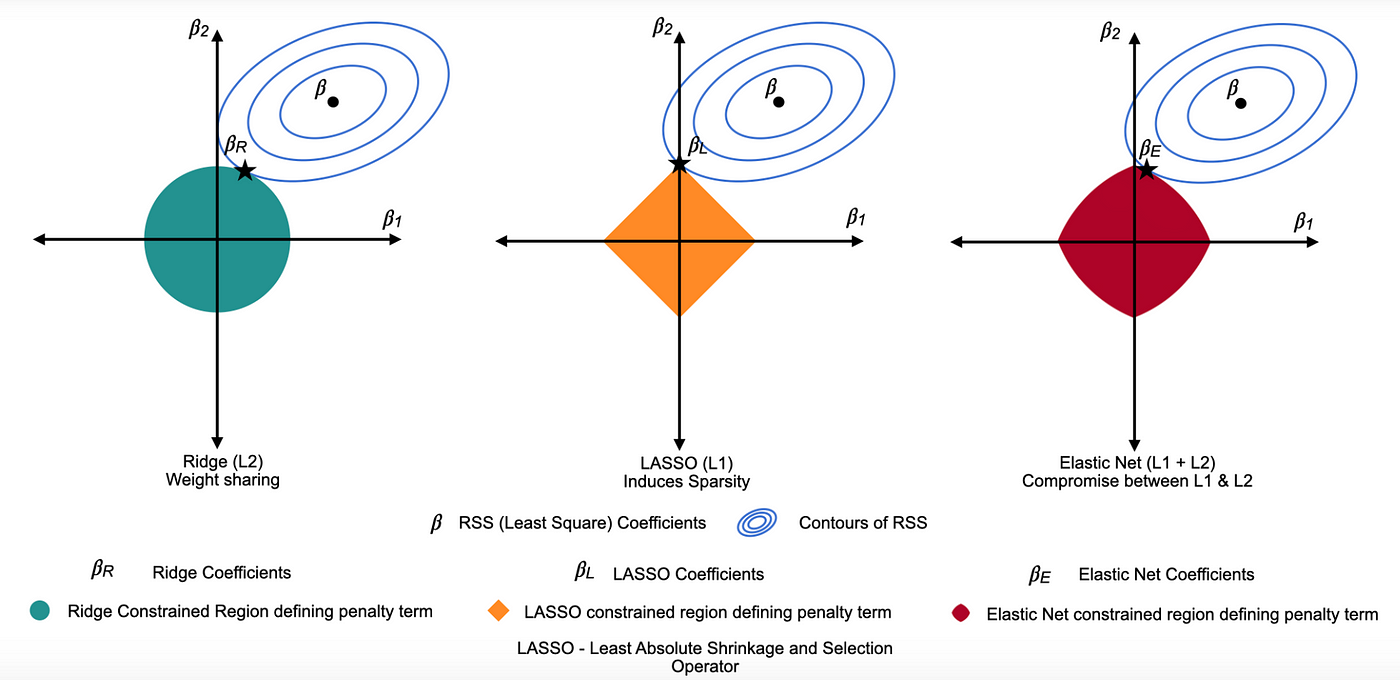

These regularization techniques help control the complexity of models, prevent overfitting, and improve generalization performance. The choice between Ridge, Lasso, or Elastic Net depends on the specific characteristics of the dataset and the goals of the model.

## Elastic net parametrization in scikit-learn

### alpha (alpha): 
This parameter controls the overall strength of the regularization. It's a positive float where higher values mean stronger regularization. Alpha acts as a global parameter that multiplies both the L1 and L2 penalty terms. You can experiment with different alpha values to control the trade-off between L1 and L2 regularization. If alpha is set to 0, the model becomes equivalent to ordinary linear regression. Typically, you'd use a grid search or cross-validation to find an appropriate alpha value for your problem.

### l1_ratio (l1_ratio): 
This parameter controls the balance between L1 and L2 regularization. It's a float between 0 and 1. A l1_ratio of 1 corresponds to pure Lasso (L1 regularization), while a l1_ratio of 0 corresponds to pure Ridge (L2 regularization). Values between 0 and 1 represent a mix of both L1 and L2 regularization. You can use this parameter to fine-tune the type of regularization applied.


### fit_intercept (fit_intercept): 
If set to True (the default), the model will include an intercept term in the regression equation. If set to False, the model will not include an intercept term, and the regression line will go through the origin.

### max_iter (max_iter): 
This parameter sets the maximum number of iterations for the optimization algorithm. The solver used in Elastic Net will stop iterating when either the maximum number of iterations is reached or convergence is achieved. You can adjust this value if needed.

In [23]:
# Example parameterization
alpha_value = 0.5  # Adjust this value
l1_ratio_value = 0.5  # Adjust this value

# Create an Elastic Net model with specified parameters
elastic_net = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio_value, fit_intercept=True, max_iter=1000)

# Fit the model to your data
elastic_net.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
 
print("Mean Square Error : ",mse)

Mean Square Error :  2.0592887366753323


In [24]:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 2)
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an ElasticNetCV model with specified alpha and l1_ratio values
alphas = [0.001, 0.01, 0.1, 1.0]
l1_ratios = [0.1, 0.5, 0.9]  # Different ratios to try
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)  # cv specifies the number of cross-validation folds

# Fit the ElasticNetCV model to the data
elastic_net_cv.fit(X_train, y_train)

# Get the best alpha and l1_ratio values selected by ElasticNetCV
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

# Create an Elastic Net model with the best alpha and l1_ratio
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# Fit the best model to the data
best_elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_elastic_net.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")
print(f"Mean Squared Error on Test Set: {mse}")


Best alpha: 0.001
Best l1_ratio: 0.1
Mean Squared Error on Test Set: 0.715367575569976
